# Data Science Hands-on

**First day**     

The goal of this notebook is:
- Explore houses dataset
- Make some plots to check different variables
- Select interesting features to apply ML algorithms
- Fill missing values
- Transform some features to more informative variables


[Pandas cheatsheet](https://github.com/creyesp/houses-project/blob/add-binder-configs/pandas_cheatsheet.md)


## What are some questions that I can answer with this dataset?
Understand your dataset is the first step of any data science project. You need to know the limitations and make a list of possible questions that could be answered with this dataset. These questions can reduce, expand or modify the scope of our project.

examples: 
- We could have great ideas but poor data
- We could have incorrect question for our dataset

**Data**: 
- We have a set of features of houses for sale in a specific time windows.  

**Business question/objective**:
- **New infocasas functionality**: Is it possible to offer an estimated price for selling given house characteristics (uploaded by owner in the webpage) without asking an appraiser? 


# Exploratory data analysis
- How many rows are in our dataset?
- How many columns are in our dataset?
- What data types are in the columns?
- Are there missing values in the dataset? Do we infer missing values? how?
- Are there outlier values? 

Data types:
- **Numeric**:
    - *Discrete*: variables that have finite possible values.
    - *Continuous*:  variables that can have an infinite number of possible values
- **Categorical, variables that have 2 or more possible values**:
    - *Ordinal*: these values have a meaningful order or rank. Ex. marks, A, B, C
    - *Nominal*: the order of those values have no meaning. Ex, names
- **Unstructured**:
    - *text*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom module
import handson

%matplotlib notebook

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

## Load dataset


In [3]:
url_dataset = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
col_name = ['sex', 'length', 'diameter', 'height', 'whole_weight',
            'shucked_weight', 'viscera_weight', 'shell_weight', 'rings', ]

# Read csv file and assign to df variable
df = pd.read_csv(url_dataset, names=col_name)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [23]:
samples = np.random.randint(df.shape[0], size=115)
df.loc[samples, 'height'] = None

samples = np.random.randint(df.shape[0], size=115)
df.loc[samples, 'viscera_weight'] = None

samples = np.random.randint(df.shape[0], size=115)
df.loc[samples, 'sex'] = None

## General information about our dataset

In [24]:
# Check the name of columns (features)
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [25]:
# Look at the first 5 rows of our dataset
df['sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: sex, dtype: object

In [26]:
# Get number of rows and columns
df.shape

(4177, 9)

In [27]:
# Get data types of columns
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [28]:
# Select index and columns
df[['sex', 'length']].tail()

df.loc[10:15, ['sex', 'length']]

df.iloc[10:15, [0, 1]]

df[df['sex']=='M'].head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
8,M,0.47,0.37,0.12,0.51,0.22,0.11,0.17,9
11,M,0.43,0.35,0.11,0.41,0.17,0.08,0.14,10


In [29]:
# Check if there are missing values in each column
df.isnull().any()

sex                True
length            False
diameter          False
height             True
whole_weight      False
shucked_weight    False
viscera_weight     True
shell_weight      False
rings             False
dtype: bool

In [30]:
# Get percentage of missing values from each column
df.notnull().sum() / df.shape[0] * 100

sex               97.29
length           100.00
diameter         100.00
height            97.25
whole_weight     100.00
shucked_weight   100.00
viscera_weight    97.32
shell_weight     100.00
rings            100.00
dtype: float64

In [31]:
# Get number of unique values for each feature
df.nunique()

sex                  3
length             134
diameter           111
height              51
whole_weight      2429
shucked_weight    1515
viscera_weight     875
shell_weight       926
rings               28
dtype: int64

In [32]:
# Get 5 largest values of some feature
df['length'].nlargest()

1428   0.81
2334   0.80
1209   0.78
3715   0.78
1763   0.78
Name: length, dtype: float64

In [33]:
# Get 5 smallest values of some feature

df['length'].nsmallest()

236    0.07
238    0.11
237    0.13
2114   0.13
1986   0.14
Name: length, dtype: float64

## Statistic resume
### Numeric variables
Look at statistic info for each columns and check which columns has unusual behavior. 
- Are all positive values?
- is standard deviation different to zero?
- How long is percentil 75 from max?


In [34]:
# Get a resume of numerical columns from our dataset
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.00,4177.00,4062.00,4177.00,4177.00,4065.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,11.00
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,29.00


In [35]:
# Get percentile 5 and 95
df.quantile([0.01, 0.95]).transpose()

,0.01,0.95
length,0.20,0.69
diameter,0.14,0.55
height,0.04,0.20
whole_weight,0.04,1.69
shucked_weight,0.01,0.74
viscera_weight,0.01,0.38
shell_weight,0.01,0.48
rings,4.00,16.00


In [36]:
# Get mean, median or std
df['length'].mean(), df['length'].median(), df['length'].std()

(0.5239920995930099, 0.545, 0.12009291256479998)

### Categeries resume

In [37]:
# Get a resume of no numerical columns from our dataset. 
# Hint: use include='O' as argument in resume function
df.describe(include='O')

,sex
count,4064
unique,3
top,M
freq,1476



## Visualization
[Seaborn](https://seaborn.pydata.org/) is a very useful package to make EDA (built on [Matplotlib](https://matplotlib.org/)), it's a statistical data visualization package and it's easy to create univarible and bivarible plots.
<img src="img/seaborn.png" />

### Univarible plots
- [Distribution](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)
- [Histograms](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)
- [Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)


<IPython.core.display.Javascript object>


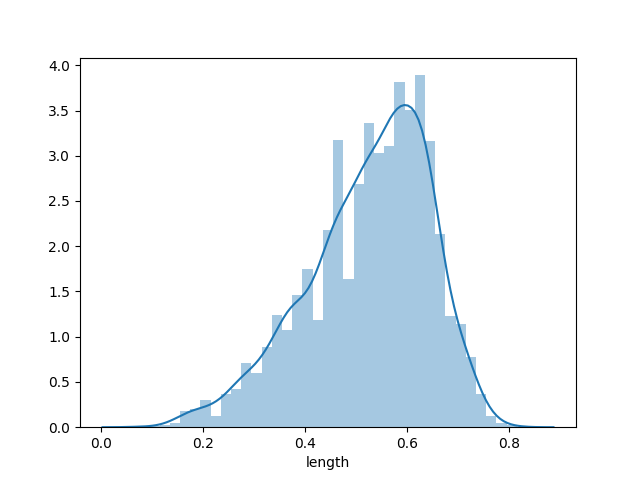

In [38]:
# Plot price distribution
f, ax = plt.subplots()
sns.distplot(df['length'], ax=ax)


<IPython.core.display.Javascript object>


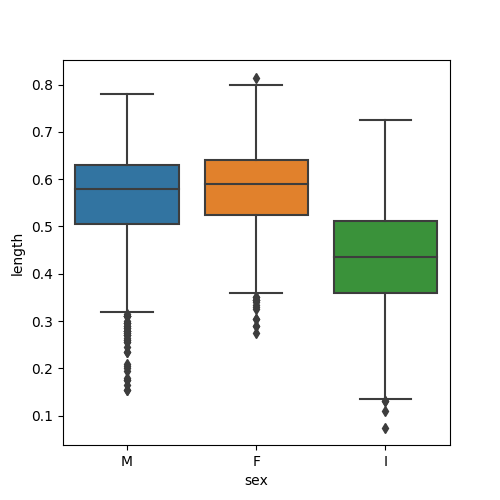

In [39]:
# Plot boxplots of length group by some categorical feature 
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='sex', y='length', data=df)


<IPython.core.display.Javascript object>


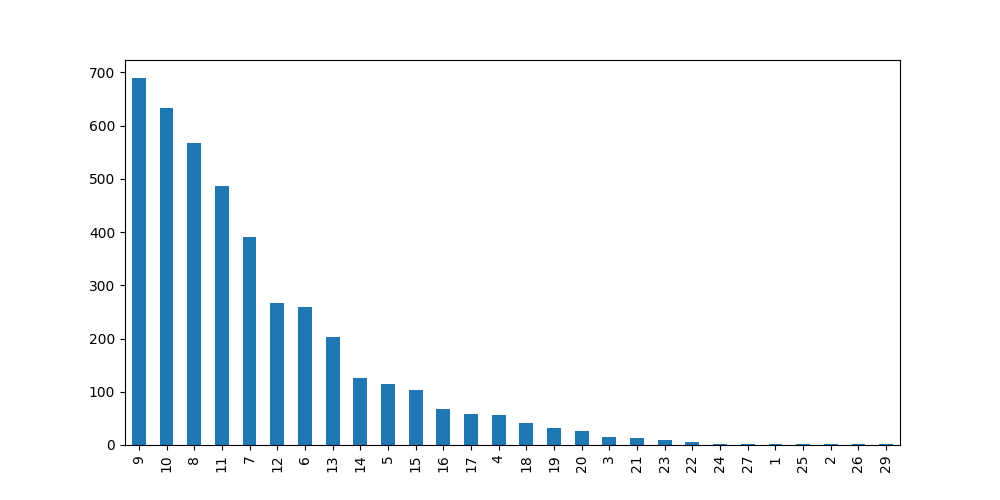

In [40]:
f, ax = plt.subplots(figsize=(10, 5))
df['rings'].value_counts().plot(kind='bar', ax=ax)

<IPython.core.display.Javascript object>


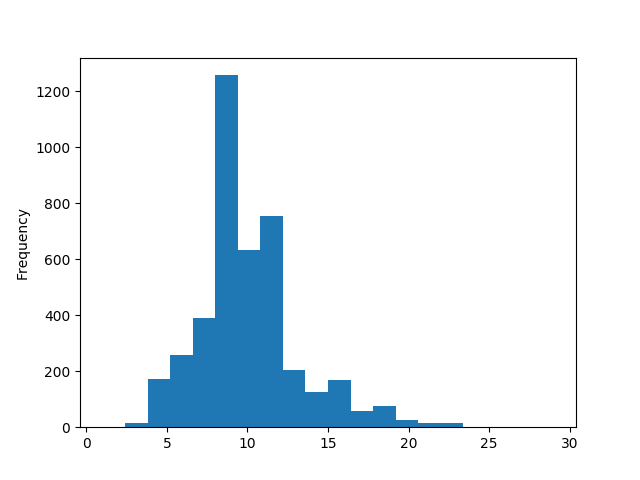

In [41]:
# Plot histogram of rings feature
f, ax = plt.subplots()
df['rings'].plot.hist(bins=20, ax=ax)


### bivarible plots
- [Scatter](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)
- [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)
- [Relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

<IPython.core.display.Javascript object>


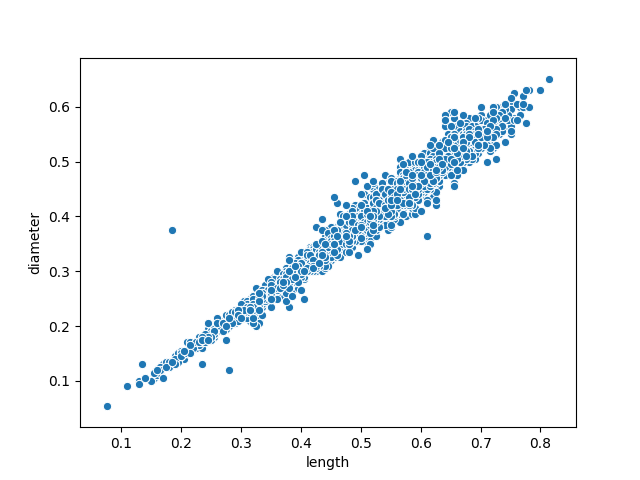

In [42]:
# make scatter plot, ex ano_de_construccion and precio, or gastos_comunes vs precio

f, ax = plt.subplots()
sns.scatterplot(x='length', y='diameter', data=df, ax=ax)

<IPython.core.display.Javascript object>


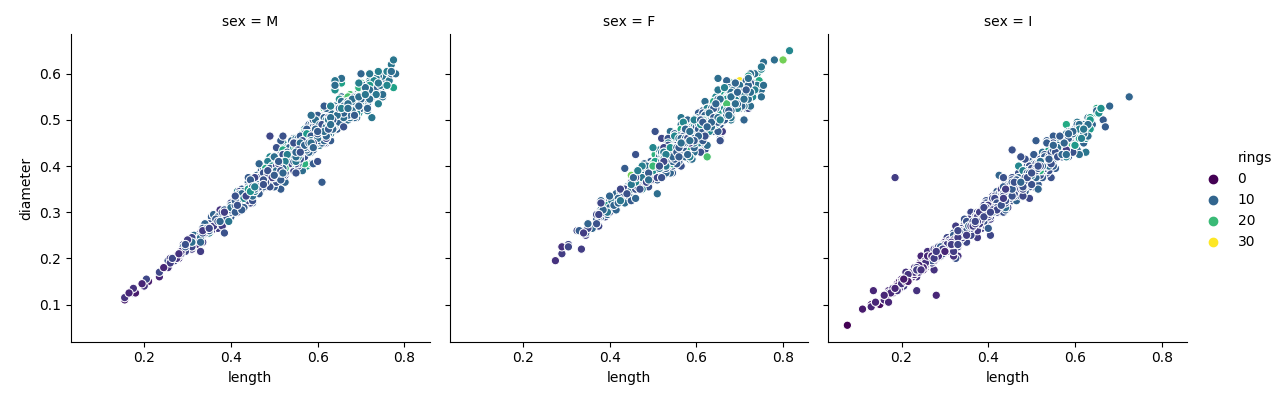

In [43]:
# Make a relplot using for example m2_edificados, precio, banos, dormitorios
sns.relplot(
    x="length", 
    y="diameter",
    col="sex",
    col_wrap=3,
    hue='rings',
    palette='viridis',
    data=df,
    height=4,
)

<IPython.core.display.Javascript object>


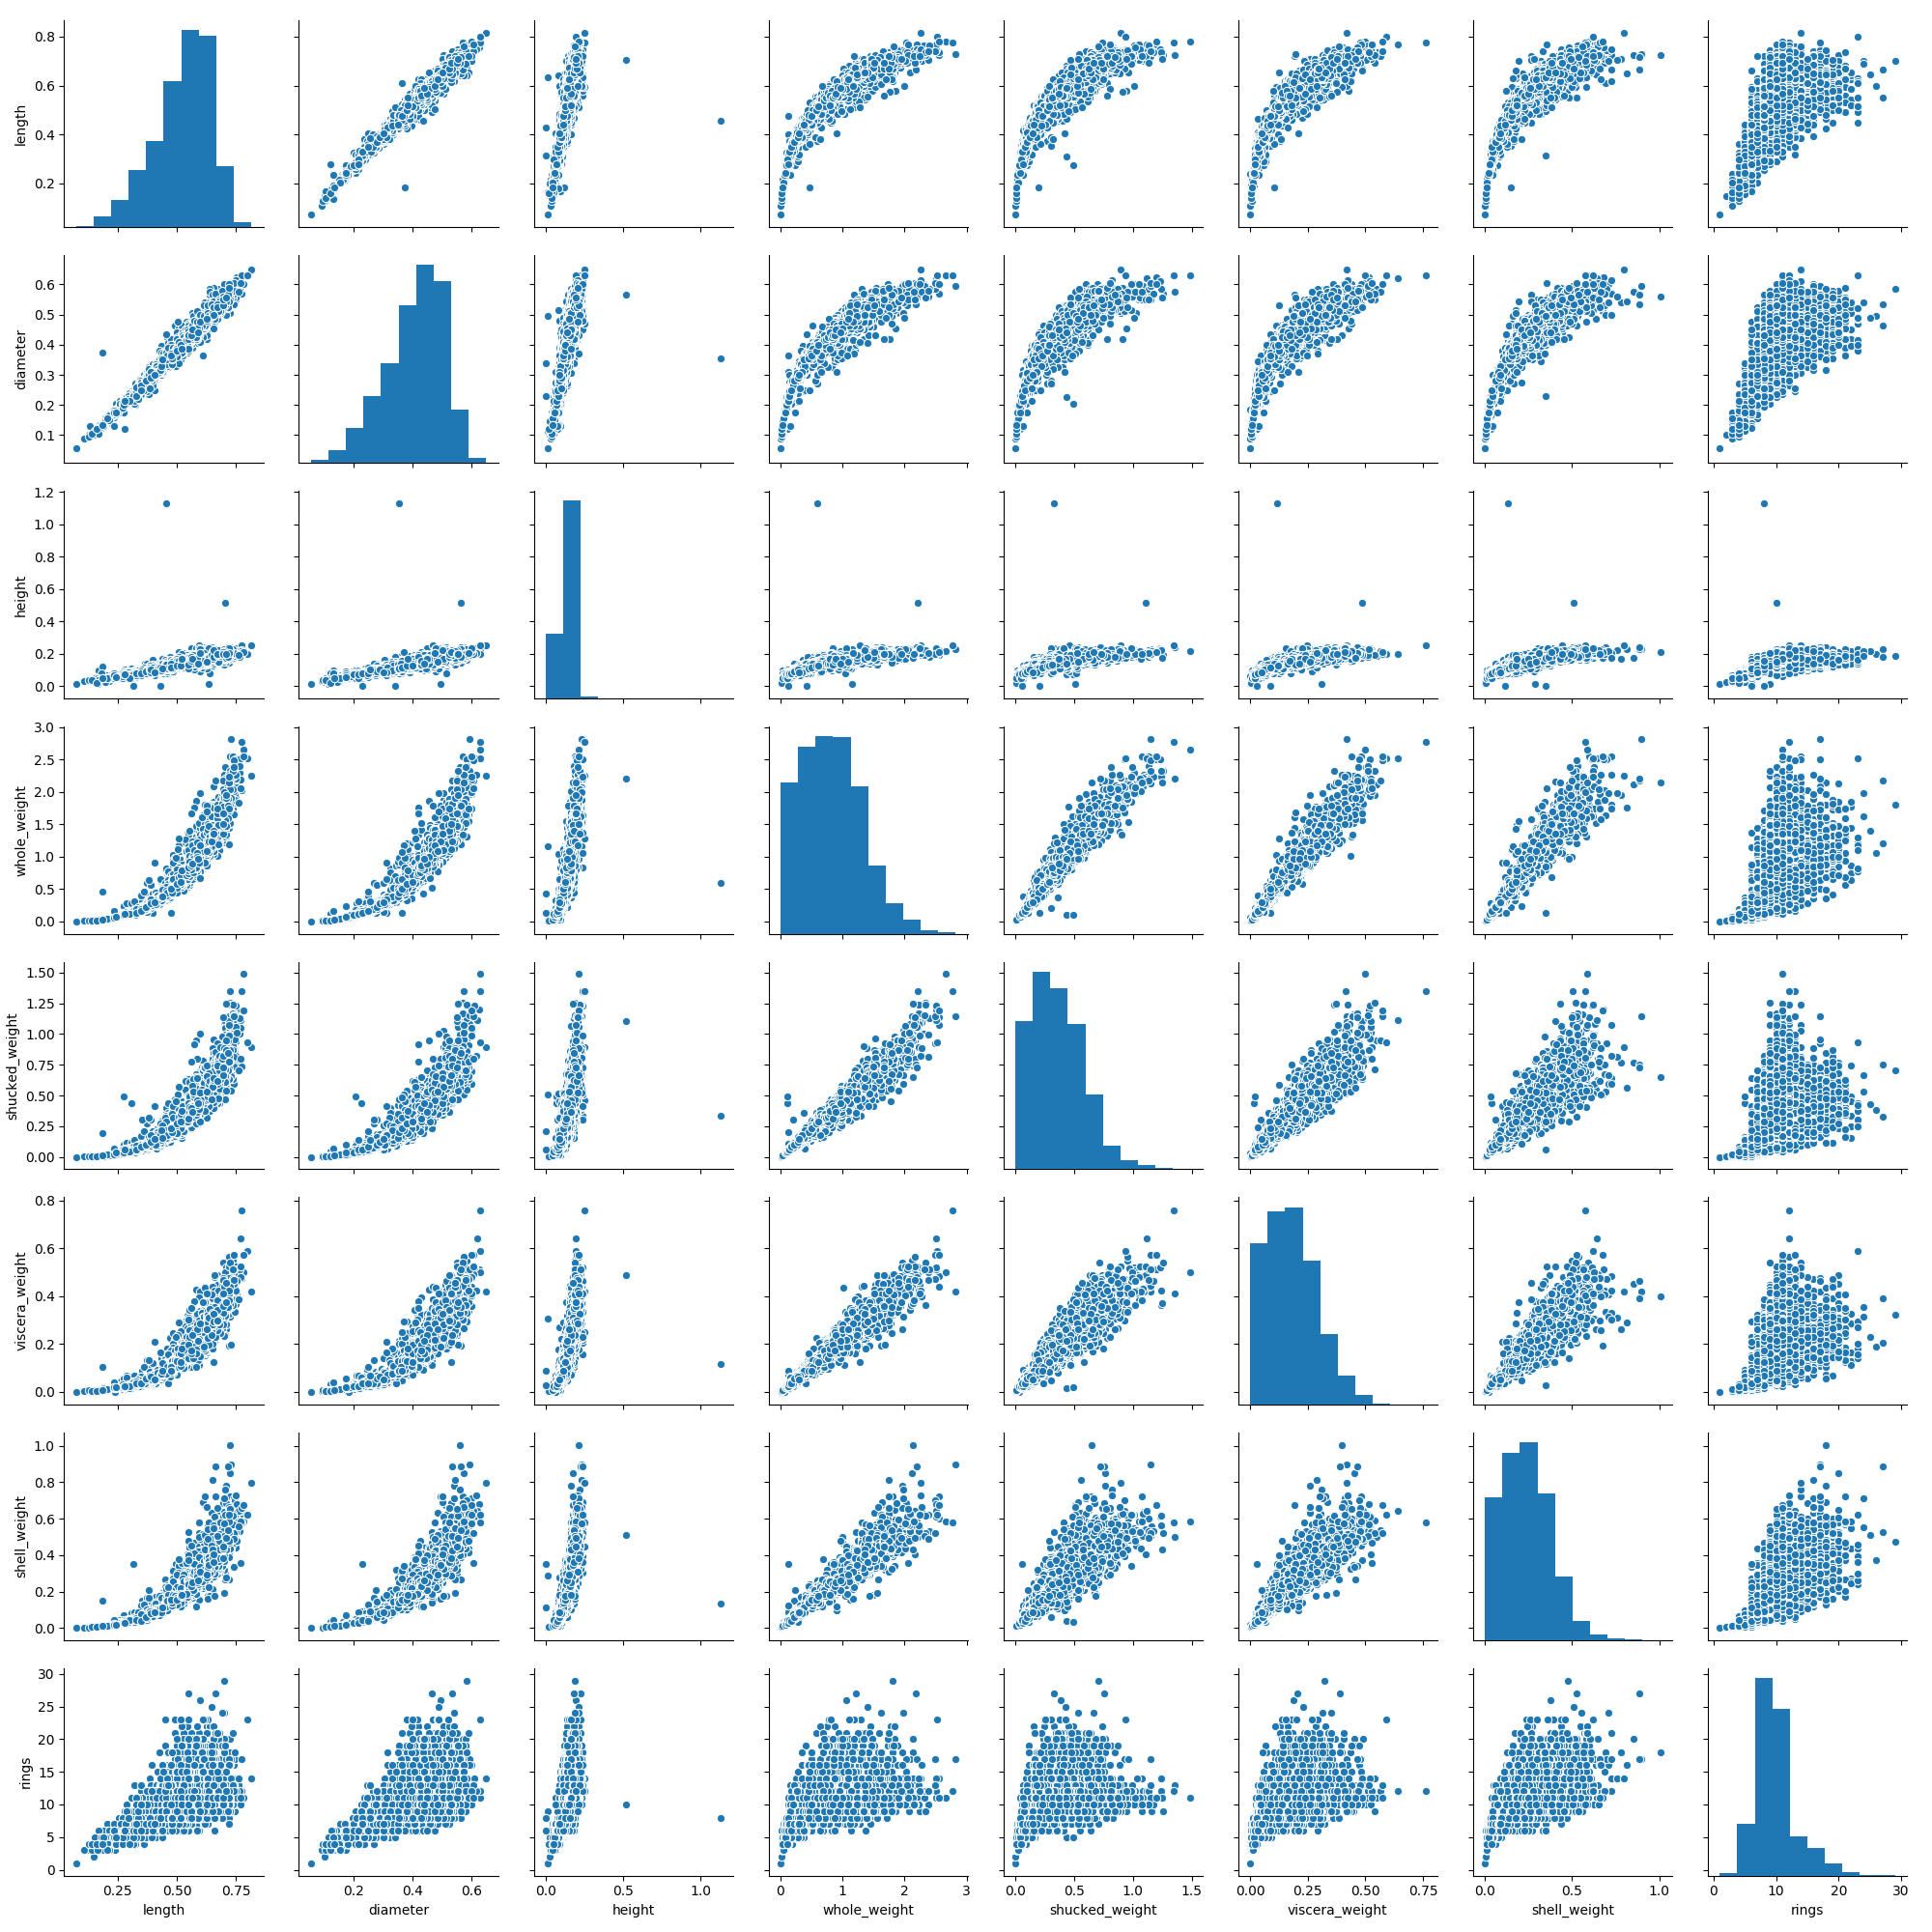

/home/cesar/software/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cesar/software/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [44]:
# Select continuous feature and make a pairplot

features = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings']
sns.pairplot(df[features]);

<IPython.core.display.Javascript object>


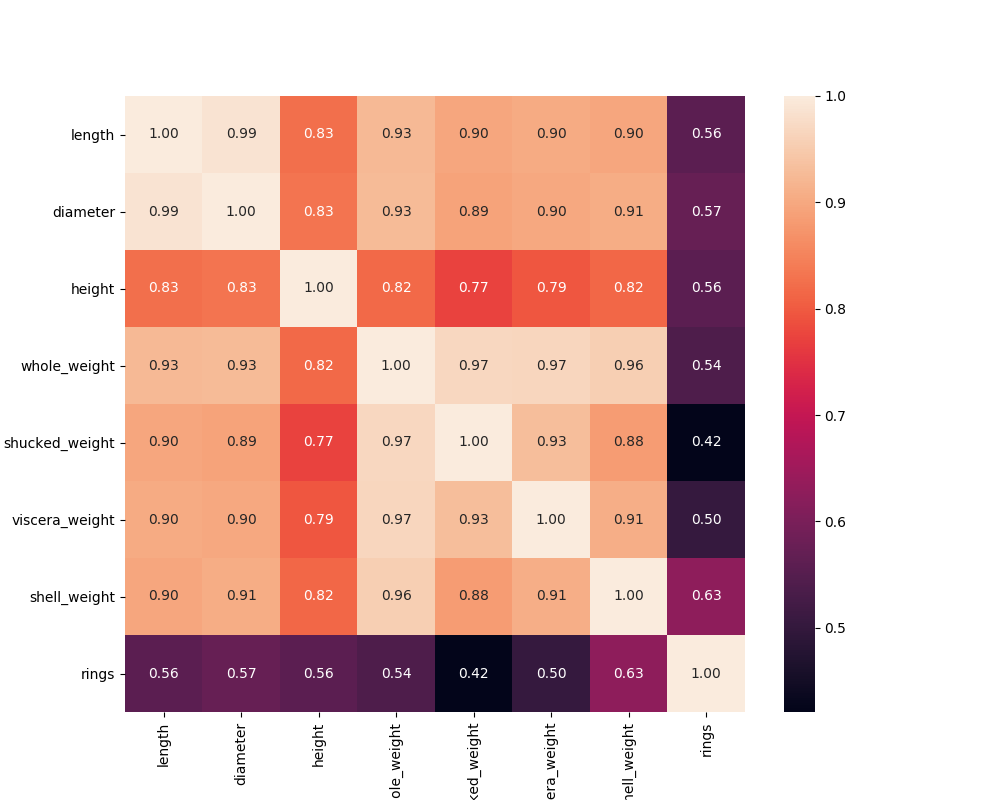

In [45]:
# Select continuous feature, compute correlations between them and make a heatmap

features = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings']

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, fmt='.02f', ax=ax)


# Data preparation

**"The quality and quantity of data that you gather will directly determine how good your predictive model can be."**

- Select relevant features
- Clean and Missing values imputation




<table>
  <tr>
    <th>Feature selection</th>
    <th>Filling missing values</th>
  </tr>
  <tr>
    <th><img src="http://dkopczyk.quantee.co.uk/wp-content/uploads/2018/10/feat_sel-600x265.png" /></th>
    <th><img src="https://i.stack.imgur.com/E4mhD.png" /></th>
</table>


## Select feature for analysis
Check dataset [documentation](https://github.com/creyesp/houses-project/blob/add-binder-configs/data/dataset_description.md) to choose the most interesting feature to answer our questions.

In [46]:
columns_to_analyze = [
    'sex',
    'length',
    'diameter',
    'height',
    'whole_weight',
    'shucked_weight',
    'viscera_weight',
    'shell_weight',
    'rings',
]

## Split dataset in numerical and string variables
Pandas has a method to split dataset group by dtypes:
- **'object'**: To select strings you must use the object dtype
- **'number'**: To select all numeric types
- **'category'**: To select Pandas categorical dtypes
- **'datetime'**: To select datetimes
- **'timedelta'**: To select timedeltas

In [47]:
df_num = df[columns_to_analyze].select_dtypes(include='number')
df_obj = df[columns_to_analyze].select_dtypes(include='object')

print('Numerical columns: {}\n'.format(df_num.columns.tolist()))
print('Caterorial columns: {}'.format(df_obj.columns.tolist()))

Numerical columns: ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

Caterorial columns: ['sex']


## Missing values imputation
Some features have only 1 valid value and the rest of the values are Nan (Not a number).

In [48]:
# Fill missing values with 0
df_num['viscera_weight'].fillna(1, inplace=True)

df_num['height'].fillna(df_num['height'].median(), inplace=True)


In [49]:
# Fill missing categories
df_obj['sex'].fillna('NN', inplace=True)

 ## Feature transformation
 We can create new features applying some functions or filters to transform them and get a more informative features.

In [50]:
df_num['small'] = (df_num['length'] <= 0.5) | (df_num['height'] < 0.5).astype(float)

df_num['sex_2'] = df_obj['sex'].map({'M': 'Male', 'F': 'Female'})

### Binning
Some variables like years or ages is an example of a feature type that might benefit from transformation into a binning variable.

- **Create a new variable called decada that transform "ano_de_cosntruccion" to "decada". Use pd.cut()**

In [51]:
range_decade = np.arange(start=0, stop=1.1, step=0.1)
range_label = np.arange(start=0, stop=1, step=0.1)

df_num['length_bin'] = pd.cut(df['length'],
                              bins=range_decade,
                              labels=range_label, 
                              right=False
                             ).astype(float)
df_num[['length_bin', 'length']].head(5)

,length_bin,length
0,0.40,0.46
1,0.30,0.35
2,0.50,0.53
3,0.40,0.44
4,0.30,0.33


One useful transformation is [80/20 rule or Pareto Rule](https://en.wikipedia.org/wiki/Pareto_principle), it's say that  for many events, roughly 80% of the effects come from 20% of the causes. In our case "barrio" feature has a similar behaviour.  
<img src="https://www.dansilvestre.com/wp-content/uploads/2017/12/DanSilvestre.com_-1.png" width="50%"/>

Nominal features like "barrio" can be transformed into a numerical variable applying **ONE-HOT encoding**.
<img src="img/one-hot-encoding.png" />

- **Apply one-hot encoding on Pareto's transformation of "bario" feature and add prefix='ZN_', then assign to zona variable.**
- **Apply one-hot encoding on "disposicion" feature and add prefix='DISP_', then assign to zona disp.**


In [52]:
# handson.pareto_rule(df_obj['barrio']) 

sex = pd.get_dummies(df_obj['sex'], prefix='SEX_',)
pd.concat([sex, df_obj], axis=1).head()

,SEX__F,SEX__I,SEX__M,SEX__NN,sex
0,0,0,1,0,M
1,0,0,1,0,M
2,1,0,0,0,F
3,0,0,1,0,M
4,0,1,0,0,I


Finally concatenate all new features and drop redundant 

In [53]:
df_num_final = pd.concat([df_num, sex], axis=1)
drop_col = ['length',]
df_num_final.drop(columns=drop_col, inplace=True)

## Apply customs filters
- **Get percentile 5 and 95 or 1 and 99 to get a hint of posibles filter to get a clean dataset.**

In [54]:
df_num_final.quantile([0.05, 0.95])

,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,small,length_bin,SEX__F,SEX__I,SEX__M,SEX__NN
0.05,0.22,0.07,0.13,0.05,0.03,0.04,6.00,1.00,0.20,0.00,0.00,0.00,0.00
0.95,0.55,0.20,1.69,0.74,0.42,0.48,16.00,1.00,0.60,1.00,1.00,1.00,0.00


- Create a filter

In [55]:
mask = (
    df_num_final['rings'].isin([1, 2, 3, 4, 5])
    & (df_num_final['length_bin'].between(0, 0.8))
    & (df_num_final['viscera_weight'] != 0.5)
)
mask.sum()

189

## Drop no informative columns and drop missing row

In [56]:
zero_std_col = df_num_final[mask].std() == 0
df_final = df_num_final[mask].drop(columns=zero_std_col[zero_std_col].index)

In [57]:
handson.info(df_final)

,dtypes,isnull,%null,nunique
diameter,float64,False,0.00,46
height,float64,False,0.00,22
whole_weight,float64,False,0.00,153
shucked_weight,float64,False,0.00,120
viscera_weight,float64,False,0.00,84
shell_weight,float64,False,0.00,84
rings,int64,False,0.00,5
sex_2,object,True,87.30,2
length_bin,float64,False,0.00,5
SEX__F,uint8,False,0.00,2


In [58]:
df_final.describe()

,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bin,SEX__F,SEX__I,SEX__M,SEX__NN
count,189.00,189.00,189.00,189.00,189.00,189.00,189.00,189.00,189.00,189.00,189.00,189.00
mean,0.19,0.06,0.10,0.05,0.04,0.03,4.50,0.20,0.02,0.85,0.11,0.03
std,0.05,0.02,0.07,0.06,0.14,0.02,0.71,0.07,0.14,0.36,0.31,0.16
min,0.06,0.01,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,0.15,0.05,0.04,0.02,0.01,0.01,4.00,0.20,0.00,1.00,0.00,0.00
50%,0.18,0.07,0.08,0.03,0.02,0.03,5.00,0.20,0.00,1.00,0.00,0.00
75%,0.22,0.08,0.12,0.06,0.03,0.04,5.00,0.20,0.00,1.00,0.00,0.00
max,0.34,0.14,0.38,0.49,1.00,0.10,5.00,0.40,1.00,1.00,1.00,1.00


## Save ready dataset 

In [59]:
df_final.to_csv('../data/dataset_anabalon.csv', index=False)